In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#plt.style.use('seaborn')
#plt.rcParams['axes.unicode_minus'] = False
#plt.rcParams['font.family'] = 'SimHei'
#%matplotlib inline 

#plt.rcParams['xtick.direction'] = 'inout'  # x軸刻度 位置
#plt.rcParams['xtick.major.size'] = 3.5 # x軸刻度 長度

In [56]:
#臺中市政府警察局106年11月份交通事故資料
url_10611 = 'https://quality.data.gov.tw/dq_download_csv.php?nid=72293&md5_url=27099e7b514bec2a041fd8d0194fbd69'

#臺中市政府警察局106年10月份交通事故資料
#url_10610 = 'https://quality.data.gov.tw/dq_download_csv.php?nid=59792&md5_url=351eb4516b664646e487f4b7ff5d6671'

In [57]:
# 使用pandas讀取網路連結檔案
df_10611 = pd.read_csv(url_10611)
#df_10610 = pd.read_csv(url_10610)

# 使用pandas 存檔
#df_10611.to_csv('交通事故10611.csv')
#df_10610.to_csv('交通事故10610.csv')

## 連接資料庫

In [2]:
# 資料庫連接
# CHARSET=UTF8; 和 cn.setencoding(encoding='utf-8') 都要設定

import pyodbc
cn = pyodbc.connect("DRIVER={MySQL ODBC 8.0 ANSI Driver}; SERVER=localhost; PORT=3306;DATABASE=taichung; UID=root; PASSWORD=123456;OPTION=3;CHARSET=UTF8;") 
cn.setencoding(encoding='utf-8')
cursor = cn.cursor()

In [541]:
#cursor.execute("create database taichung;")
cursor.execute("use taichung;")
cursor.execute("show tables;")
print(cursor.fetchall())
#cursor.commit()
#cn.close()

[('pls', ), ('qtable', ), ('taichung_', ), ('taichung_201711', ), ('tc', ), ('tc_lite', )]


### 資料內容    　　　  chat: 縣市、區、速限(非道路)  　　　其他都是數字

###  ===較少的欄位 寫入資料庫OK===

In [62]:
df = df_10611[['年', '月','日', '時', '分', '縣市', '區', 'GPS座標X', 'GPS座標Y']]
df = df.fillna(value='NULL')
df.tail()

,年,月,日,時,分,縣市,區,GPS座標X,GPS座標Y
10127,2017,11,30,22,45,臺中市,北區,24.1668,120.668
10128,2017,11,30,22,46,臺中市,豐原區,NULL,NULL
10129,2017,11,30,23,0,臺中市,豐原區,24.2472,120.73
10130,2017,11,30,23,28,臺中市,西區,24.1392,120.678
10131,2017,11,30,23,42,臺中市,南屯區,24.139,120.61


In [89]:
df.dtypes

年           int64
月           int64
日           int64
時           int64
分           int64
縣市         object
區          object
GPS座標X    float64
GPS座標Y    float64
dtype: object

In [91]:
## 建資料表語法
tcl = """create table tc_lite("""

for k in range(1):
    for i, j in zip(df.columns, df.dtypes):
        if j.name.find("int")==0:
            tcl = (tcl + """\n{} int NULL,""").format(i)
        elif j.name.find("float")==0:
            tcl = (tcl + """\n{} float NULL,""").format(i)
        else:
            tcl = (tcl + '\n{} varchar(20) NULL,').format(i)
            
tcl = tcl[:-1] + ');'   ##去掉最後的 逗點
print(tcl)

create table tc_lite(
年 int NULL,
月 int NULL,
日 int NULL,
時 int NULL,
分 int NULL,
縣市 varchar(20) NULL,
區 varchar(20) NULL,
GPS座標X float NULL,
GPS座標Y float NULL);


In [540]:
## 查詢現有資料表
#cursor.execute(str(tcl))
cursor.execute("show tables")
cursor.fetchall()

[('tc_lite', )]

In [105]:
## insert 2版
### 建資料表 測試寫入全部
for i in df.index:
    cursor.execute("insert into tc_lite values({}, {}, {}, {}, {}, '{}', '{}', {}, {});" \
          .format(df.loc[i][0], df.loc[i][1], df.loc[i][2], df.loc[i][3], df.loc[i][4], df.loc[i][5], df.loc[i][6]\
                 , df.loc[i][7], df.loc[i][8]))
cursor.commit()

## ===== 3版  成功 ======  最新版

In [447]:
# 資料庫連接
# CHARSET=UTF8; 和 cn.setencoding(encoding='utf-8') 都要設定

import pyodbc
cn = pyodbc.connect("DRIVER={MySQL ODBC 8.0 ANSI Driver}; SERVER=localhost; PORT=3306;DATABASE=taichung; UID=root; PASSWORD=123456;OPTION=3;CHARSET=UTF8;") 
cn.setencoding(encoding='utf-8')
cursor = cn.cursor()

In [5]:
#cursor.execute("create database try")
cursor.execute("use try;")
cursor.execute("show databases")
cursor.fetchall()

[('information_schema', ),
 ('mysql', ),
 ('performance_schema', ),
 ('sakila', ),
 ('sys', ),
 ('taichung', ),
 ('try', ),
 ('trycollation', ),
 ('world', )]

In [534]:
## create table 3版_最新版 *** 看第一列決定type
q_tc = 'create table tc_lite('

for k in range(1):
    for i, j in zip(dff.columns, dff.dtypes):
        if type(dff.loc[0][i]) == str:
            q_tc = (q_tc + '\n{} varchar(20) NULL,').format(i)
        elif type(dff.loc[0][i]) == float:
            q_tc = (q_tc + '\n{} float NULL,').format(i)
        else:
            q_tc = (q_tc + '\n{} int NULL,').format(i)
            
q_tc = q_tc[:-1] + ');'   ##去掉最後的 逗點
print(q_tc)

create table tc_lite(
年 int NULL,
月 int NULL,
日 int NULL,
時 int NULL,
分 int NULL,
縣市 varchar(20) NULL,
區 varchar(20) NULL,
GPS座標X float NULL,
GPS座標Y float NULL);


In [535]:
#cursor.execute("use try;")
cursor.execute("drop table tc_lite")
cursor.execute(q_tc)
cursor.execute("show tables;")
cursor.fetchall()

[('tc_lite', )]

In [536]:
##### insert 3版 #########最新版
for i in dff.index:
    cursor.execute("insert into tc_lite values({})".format(str(list(dff.loc[i]))[1:-1]))

cursor.commit()
cursor.execute("select * from tc_lite;")
cursor.fetchall()

[(2017, 11, 1, 0, 7, '?箔葉撣?', '?批陸?\x80', 24.0738, 120.663),
 (2017, 11, 1, 0, 17, '?箔葉撣?', '瞏剖??\x80', 24.2013, 120.703),
 (2017, 11, 1, 1, 0, '?箔葉撣?', '瞏剖??\x80', 24.1946, 120.701)]

### 0513版 寫入全部的資料 in Datebase:try

#### nan 還沒處理

In [6]:
df_10611.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10132 entries, 0 to 10131
Data columns (total 49 columns):
年            10132 non-null int64
月            10132 non-null int64
日            10132 non-null int64
時            10132 non-null int64
分            10132 non-null int64
縣市           10132 non-null object
區            10132 non-null object
死            6988 non-null float64
受傷           6988 non-null float64
2-30         6988 non-null float64
天候           9925 non-null float64
光線           6365 non-null float64
道路類別         6364 non-null float64
速限           9931 non-null object
道路型態         6338 non-null float64
事故位置         6340 non-null float64
路面鋪裝         6338 non-null float64
路面狀態         6337 non-null float64
路面缺陷         6337 non-null float64
障礙物          6339 non-null float64
視距           6339 non-null float64
號誌種類         6353 non-null float64
號誌動作         6337 non-null float64
分向設施         6339 non-null float64
快車道或一般車道間    6339 non-null float64
快慢車道間        6338 non-

In [69]:
## 資料前處理
df = df_10611.rename(columns={'2-30':'2_30', '當事者區分(類別)':'當事者區分_類別'})
df = df.fillna(value='NULL')
df['車輛撞擊部位其他'] = df['車輛撞擊部位其他'].replace('  ', 'NULL')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10132 entries, 0 to 10131
Data columns (total 49 columns):
年            10132 non-null int64
月            10132 non-null int64
日            10132 non-null int64
時            10132 non-null int64
分            10132 non-null int64
縣市           10132 non-null object
區            10132 non-null object
死            10132 non-null object
受傷           10132 non-null object
2_30         10132 non-null object
天候           10132 non-null object
光線           10132 non-null object
道路類別         10132 non-null object
速限           10132 non-null object
道路型態         10132 non-null object
事故位置         10132 non-null object
路面鋪裝         10132 non-null object
路面狀態         10132 non-null object
路面缺陷         10132 non-null object
障礙物          10132 non-null object
視距           10132 non-null object
號誌種類         10132 non-null object
號誌動作         10132 non-null object
分向設施         10132 non-null object
快車道或一般車道間    10132 non-null object
快慢車道間        10132 no

In [81]:
## 舊版create table  ˙.˙ nan 'NULL' 無法處理
q_all = 'create table tc('

for k in range(1):
    for i, j in zip(df.columns, df.dtypes):
        if j.name.find("int")==0:
            q_all = (q_all + """\n{} int NULL,""").format(i)
        elif j.name.find("float")==0:
            q_all = (q_all + """\n{} float NULL,""").format(i)
        else:
            q_all = (q_all + '\n{} varchar(20) NULL,').format(i)
            
q_all = q_all[:-1] + ');'   ##去掉最後的 逗點
print(q_all)

create table tc(
年 int NULL,
月 int NULL,
日 int NULL,
時 int NULL,
分 int NULL,
縣市 varchar(20) NULL,
區 varchar(20) NULL,
死 varchar(20) NULL,
受傷 varchar(20) NULL,
2_30 varchar(20) NULL,
天候 varchar(20) NULL,
光線 varchar(20) NULL,
道路類別 varchar(20) NULL,
速限 varchar(20) NULL,
道路型態 varchar(20) NULL,
事故位置 varchar(20) NULL,
路面鋪裝 varchar(20) NULL,
路面狀態 varchar(20) NULL,
路面缺陷 varchar(20) NULL,
障礙物 varchar(20) NULL,
視距 varchar(20) NULL,
號誌種類 varchar(20) NULL,
號誌動作 varchar(20) NULL,
分向設施 varchar(20) NULL,
快車道或一般車道間 varchar(20) NULL,
快慢車道間 varchar(20) NULL,
路面邊線 varchar(20) NULL,
事故類型及型態 varchar(20) NULL,
主要肇因 varchar(20) NULL,
受傷程度 varchar(20) NULL,
主要傷處 varchar(20) NULL,
保護裝備 varchar(20) NULL,
行動電話 varchar(20) NULL,
當事者區分_類別 varchar(20) NULL,
車輛用途 varchar(20) NULL,
當事者行動狀態 varchar(20) NULL,
駕駛資格情形 varchar(20) NULL,
駕駛執照種類 varchar(20) NULL,
飲酒情形 varchar(20) NULL,
車輛撞擊部位最初 varchar(20) NULL,
車輛撞擊部位其他 varchar(20) NULL,
肇事因素個別 varchar(20) NULL,
肇事因素主要 varchar(20) NULL,
肇事逃逸 varchar(20) NULL,
職業 varchar(20

In [ ]:
## 建table tc
cursor.execute("drop table tc;")
cursor.execute(q_all)
cursor.commit()

In [55]:
cursor.execute("use try;")
cursor.execute("show tables;")
cursor.fetchall()

[('tc', ), ('tc_lite', )]

In [87]:
## insert data to tc
## df_lite.iloc[i].values.tolist()##
for i in df_10611.index:
    cursor.execute("insert into tc values({})".format(str(list(df.loc[i]))[1:-1]))
cursor.commit()
cursor.execute("select count(*) from tc")
cursor.fetchall()

[(10132, )]

In [18]:
## select data from sql to dataframe in python
df_lite = pd.read_sql('select 年, 月,日,時,分,縣市,區,GPS座標X,GPS座標Y from tc limit 5;', con=cn)
df_lite.head()

,撟?,??,??,??,??,蝮??,?,GPS摨扳?X,GPS摨扳?Y
0,2017,11,1,0,7,?箔葉撣?,?批陸?,24.073801,120.663218
1,2017,11,1,0,17,?箔葉撣?,瞏剖??,24.201317,120.70316299999999
2,2017,11,1,1,0,?箔葉撣?,瞏剖??,24.19456,120.701118
3,2017,11,1,1,36,?箔葉撣?,?扈?,24.182356,120.708799
4,2017,11,1,1,50,?箔葉撣?,?扈?,24.173563,120.69446699999999


In [34]:
df_lite['GPS摨扳?X']

0    24.073801
1    24.201317
2     24.19456
3    24.182356
4    24.173563
Name: GPS摨扳?X, dtype: object

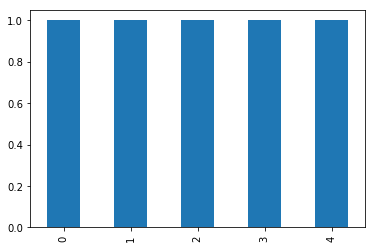

In [32]:
df_lite.iloc[:,2].plot(kind = "bar")
plt.show()

## 版本4 - executemany　　## cursor.executemany(sql, df.values.tolist())

In [63]:
manydf = df[:5]
manydf

,年,月,日,時,分,縣市,區,GPS座標X,GPS座標Y
0,2017,11,1,0,7,臺中市,霧峰區,24.0738,120.663
1,2017,11,1,0,17,臺中市,潭子區,24.2013,120.703
2,2017,11,1,1,0,臺中市,潭子區,24.1946,120.701
3,2017,11,1,1,36,臺中市,北屯區,24.1824,120.709
4,2017,11,1,1,50,臺中市,北屯區,24.1736,120.694


In [105]:
## create table 3版_最新版 *** 看第一列決定type
q_tc = 'create table exmany('

for k in range(1):
    for i, j in zip(manydf.columns, manydf.dtypes):
        if type(manydf.loc[0][i]) == str:
            q_tc = (q_tc + '\n{} varchar(20) NULL,').format(i)
        elif type(manydf.loc[0][i]) == float:
            q_tc = (q_tc + '\n{} float NULL,').format(i)
        else:
            q_tc = (q_tc + '\n{} int NULL,').format(i)
            
q_tc = q_tc[:-1] + ');'   ##去掉最後的 逗點
print(q_tc)

create table exmany(
年 int NULL,
月 int NULL,
日 int NULL,
時 int NULL,
分 int NULL,
縣市 varchar(20) NULL,
區 varchar(20) NULL,
GPS座標X float NULL,
GPS座標Y float NULL);


In [106]:
#cursor.execute("use try;")
cursor.execute("drop table many;")
cursor.execute(q_tc)
cursor.execute("show tables;")
cursor.fetchall()

[('exmany', ), ('tc', ), ('tc_lite', )]

In [144]:
#####  最新版  ##########
## executemany版 定義sql insert 語法
## cursor.executemany(sql, df.values.tolist())
def sql_insert(df, tablename):
    sql_head = "insert into " + tablename + " values("
    sql_values = df.shape[1] * "?, "
    sql_insert = sql_head + sql_values[:-2] + ")"
    return (str(sql_insert))

sql_insert(manydf, "exmany")

'insert into exmany values(?, ?, ?, ?, ?, ?, ?, ?, ?)'

In [136]:
cursor.executemany(sql_insert(manydf, "exmany"), manydf.values.tolist())
cursor.execute("select count(*) from exmany")
cursor.fetchall()

[(10, )]

### executemany 一版

In [147]:
## executemany 一版  insert into語法
sqli = "insert into exmany values("
sqlv = manydf.shape[1]*'?, ' 
sql_create = sqli + sqlv[:-2]+")"
sql_create

'insert into exmany values(?, ?, ?, ?, ?, ?, ?, ?, ?)'

In [153]:
## executemany 一版 insert into
cursor.executemany(sql_create, manydf.values.tolist())
cursor.commit()
cursor.execute("select * from exmany limit 5")
cursor.fetchall()

[(2017, 11, 1, 0, 7, '?箔葉撣?', '?批陸?\x80', 24.0738, 120.663),
 (2017, 11, 1, 0, 17, '?箔葉撣?', '瞏剖??\x80', 24.2013, 120.703),
 (2017, 11, 1, 1, 0, '?箔葉撣?', '瞏剖??\x80', 24.1946, 120.701),
 (2017, 11, 1, 1, 36, '?箔葉撣?', '?\ue919扈?\x80', 24.1824, 120.709),
 (2017, 11, 1, 1, 50, '?箔葉撣?', '?\ue919扈?\x80', 24.1736, 120.694)]